In [ ]:
import pandas as pd

# Replace with the correct path to your file inside your Google Drive
file_path = '/content/emails.csv'  # Rename the file if different
df = pd.read_csv(file_path, encoding='latin-1')  # Latin-1 handles special characters better

# Show the first few rows
df.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


Step 2: Data Preparation

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

# Load the dataset (assumes you've already loaded it in df)
print("Shape of dataset:", df.shape)
print("Dataset columns:", df.columns)

# Show first few rows
df.head()


Shape of dataset: (2255, 3002)
Dataset columns: Index(['Email No.', 'the', 'to', 'ect', 'and', 'for', 'of', 'a', 'you', 'hou',
       ...
       'connevey', 'jay', 'valued', 'lay', 'infrastructure', 'military',
       'allowing', 'ff', 'dry', 'Prediction'],
      dtype='object', length=3002)


,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


Clean & Preprocess the Text

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load the dataset (assumes it's already loaded as df)
print("Shape of dataset:", df.shape)
print("First few rows:")
print(df.head())

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Drop the "email no." column if it's just an identifier
df.drop(columns=df.columns[0], inplace=True)  # drops 'email no.'

# Show column names to confirm
print("Column names:", df.columns.tolist()[-5:])  # show last 5 column names to confirm 'prediction'

# Separate features and target
X = df.drop('prediction', axis=1)
y = df['prediction']

# If y contains categorical (spam/ham), encode it. If numeric (0.0, 1.0), convert to int
if y.dtype != 'int':
    y = y.astype(int)

# Optional: scale features for better performance in some models
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)



Shape of dataset: (2254, 3001)
First few rows:
   the  to  ect  and  for  of    a  you  hou  in  ...  connevey  jay  valued  \
0    0   0    1    0    0   0    2    0    0   0  ...       0.0  0.0     0.0   
1    8  13   24    6    6   2  102    1   27  18  ...       0.0  0.0     0.0   
2    0   0    1    0    0   0    8    0    0   4  ...       0.0  0.0     0.0   
3    0   5   22    0    5   1   51    2   10   1  ...       0.0  0.0     0.0   
4    7   6   17    1    5   2   57    0    9   3  ...       0.0  0.0     0.0   

   lay  infrastructure  military  allowing   ff  dry  prediction  
0  0.0             0.0       0.0       0.0  0.0  0.0         0.0  
1  0.0             0.0       0.0       0.0  1.0  0.0         0.0  
2  0.0             0.0       0.0       0.0  0.0  0.0         0.0  
3  0.0             0.0       0.0       0.0  0.0  0.0         0.0  
4  0.0             0.0       0.0       0.0  1.0  0.0         0.0  

[5 rows x 3001 columns]
Column names: ['military', 'allowing', 'ff', 

Step 3: Model Selection & Training

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Initialize the model
model = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred, digits=4))

print(" Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0     0.9882    0.9766    0.9824       342
           1     0.9292    0.9633    0.9459       109

    accuracy                         0.9734       451
   macro avg     0.9587    0.9700    0.9641       451
weighted avg     0.9739    0.9734    0.9736       451

 Accuracy: 0.9733924611973392
Precision: 0.9292035398230089
Recall: 0.963302752293578
F1 Score: 0.9459459459459459


In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Support Vector Machine": SVC(kernel='linear', random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42)
}

# Function to evaluate each model
def evaluate_model(name, model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n {name} Results:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))

# Train and evaluate all models
for name, model in models.items():
    evaluate_model(name, model)



 Decision Tree Results:
Accuracy: 0.9246119733924612
Precision: 0.831858407079646
Recall: 0.8623853211009175
F1 Score: 0.8468468468468469

 Support Vector Machine Results:
Accuracy: 0.9312638580931264
Precision: 0.8362068965517241
Recall: 0.8899082568807339
F1 Score: 0.8622222222222222

 Random Forest Results:
Accuracy: 0.975609756097561
Precision: 0.9454545454545454
Recall: 0.9541284403669725
F1 Score: 0.9497716894977168

 Gradient Boosting Results:
Accuracy: 0.975609756097561
Precision: 0.9622641509433962
Recall: 0.9357798165137615
F1 Score: 0.9488372093023256


Step: Plot Confusion Matrix

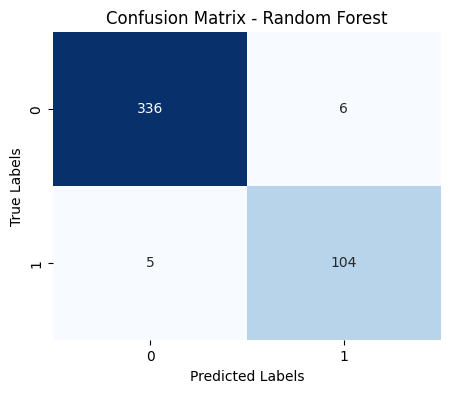

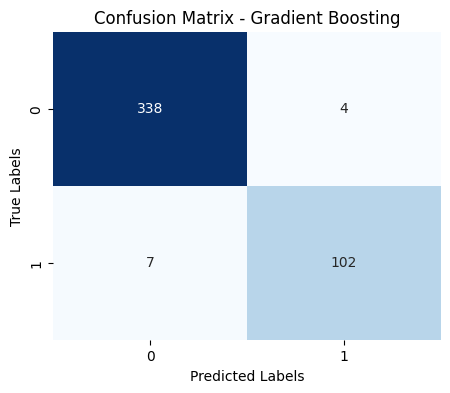

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Function to plot confusion matrix
def plot_confusion(model, model_name):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

# Plot for Random Forest
plot_confusion(models["Random Forest"], "Random Forest")

# Plot for Gradient Boosting
plot_confusion(models["Gradient Boosting"], "Gradient Boosting")


Step: Hyperparameter Tuning for Random Forest using GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

# Initialize the base model
rf = RandomForestClassifier(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=rf,
                           param_grid=param_grid,
                           cv=3,            # 3-fold cross-validation
                           n_jobs=-1,       # Use all available cores
                           verbose=1,
                           scoring='f1')    # You can also try 'accuracy' or 'precision'

# Fit GridSearch to data
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print(" Best F1 Score from GridSearchCV:", grid_search.best_score_)


Fitting 3 folds for each of 48 candidates, totalling 144 fits
Best Parameters: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
 Best F1 Score from GridSearchCV: 0.9479636405320919


Next step: Retrain with these best parameters & evaluate on test set

In [ ]:
# Retrain the Random Forest with the best params
best_rf = RandomForestClassifier(
    bootstrap=False,
    max_depth=None,
    min_samples_leaf=1,
    min_samples_split=5,
    n_estimators=100,
    random_state=42
)

best_rf.fit(X_train, y_train)
y_pred_best = best_rf.predict(X_test)

print(" Performance of Tuned Random Forest on Test Data:")
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print("Precision:", precision_score(y_test, y_pred_best))
print("Recall:", recall_score(y_test, y_pred_best))
print("F1 Score:", f1_score(y_test, y_pred_best))


🔎 Performance of Tuned Random Forest on Test Data:
Accuracy: 0.9733924611973392
Precision: 0.9369369369369369
Recall: 0.9541284403669725
F1 Score: 0.9454545454545454


classification through chatbot

In [ ]:
import re
from collections import Counter
import pandas as pd # Ensure pandas is imported here if this cell is run independently of previous cells

# Make sure label column name is exactly as in your dataframe (case sensitive)
# This is correctly taken from the last column of the original df structure after dropping the first column
# label_col = df.columns[-1] # This should still be 'prediction' as we only dropped the first column and used 'prediction' as the last

# Extract feature columns exactly — all except 'email no.' and label column
# CORRECTED: Use the column names from the X dataframe that was used for training
# X was created by dropping the first column ('email no.') and the 'prediction' column from the original df
# So, the columns of X are the features used for training.
vocab = X.columns.tolist()

print(f"Number of features: {len(vocab)}") # Should match best_rf.n_features_in_

def preprocess_email(text):
    # Lowercase and keep only letters and spaces
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    words = text.split()
    word_counts = Counter(words)
    # Create feature vector in same order as vocab
    # This loop now correctly iterates through the actual column names the model was trained on
    vector = [word_counts.get(word, 0) for word in vocab]
    return vector

def classify_email(text):
    features = preprocess_email(text)
    # This check is still useful for debugging, but should now pass
    if len(features) != best_rf.n_features_in_:
        raise ValueError(f"Feature vector length {len(features)} does not match model input {best_rf.n_features_in_}")
    # best_rf expects input as a 2D array-like structure, even for a single sample
    prediction = best_rf.predict([features])[0]
    return "Spam" if prediction == 1 else "Ham"

print("=== Spam Email Classifier Chatbot ===")
print("Type your email below. Type 'exit' to quit.")

while True:
    email_input = input("\nEnter email text: ")
    if email_input.strip().lower() == 'exit':
        print("Goodbye!")
        break
    try:
        result = classify_email(email_input)
        print(f"Prediction: {result}")
    except ValueError as e:
        print(f"Error processing email: {e}")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")




Number of features: 2999
=== Spam Email Classifier Chatbot ===
Type your email below. Type 'exit' to quit.

Enter email text:    Dear Fiza,  We’re writing to inform you about an upcoming change to Cloud Storage default buckets used in App Engine.  App Engine automatically creates a default bucket in Cloud Storage when you create an app. Starting October 31, 2025, any App Engine app that does not have a valid billing account will not be able to access the default bucket. To deploy App Engine apps, you must add a payment method, such as a credit card.  We will not delete existing default buckets without billing accounts, but read and write access will be blocked.  What you need to do To maintain uninterrupted access to your default buckets, add a valid billing account with an acceptable payment method to the affected projects listed below before October 31, 2025.  Your affected projects, format project_id (project_number), are listed below:  chartapp-82a33 (505408299043) Potential impact